# Pandas

In [5]:
import pandas as pd

# Snip the CSV

We will use `head` command (if you are using *nix operating system).

## Linux and Mac

In [6]:
!head -10 medalist.csv

## Windows 10

In [ ]:
!more +2 medalist.csv

# Load CSV

In [7]:
data = pd.read_csv('medalist.csv', skiprows=4)

In [11]:
data.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


# Matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

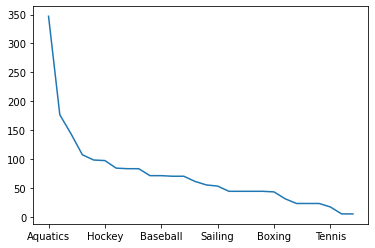

In [10]:
filteredData = data[data.Edition == 2008]
filteredData.Sport.value_counts().plot()

<AxesSubplot:>

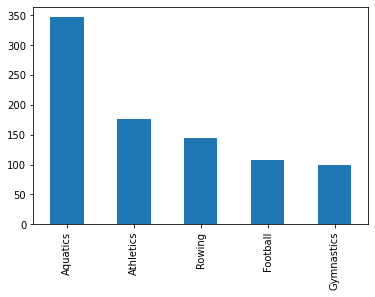

In [12]:
filteredData = data[data.Edition == 2008]
filteredData.head()
filteredData.Sport.value_counts()[:5].plot(kind='bar')

<AxesSubplot:>

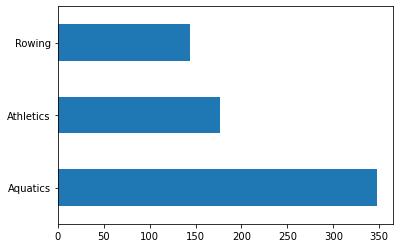

In [13]:
filteredData = data[data.Edition == 2008]
filteredData.head()
filteredData.Sport.value_counts()[:3].plot(kind='barh')

<AxesSubplot:ylabel='Sport'>

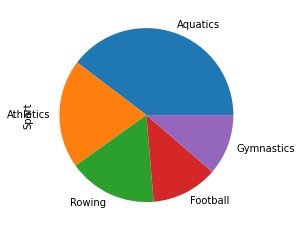

In [14]:
filteredData = data[data.Edition == 2008]
filteredData.head()
filteredData.Sport.value_counts()[:5].plot(kind='pie')

Now, in the above code, first we have got the data of Olympics 2008 edition, and then we have to count the number of sports that Olympic has and plot the line graph based on that data. The output of the above code in Jupyter Notebook is following.

<ipython-input-33-554ab5cf3262>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filteredData = data[data.Edition == 2008][data.Medal == 'Gold']


<AxesSubplot:>

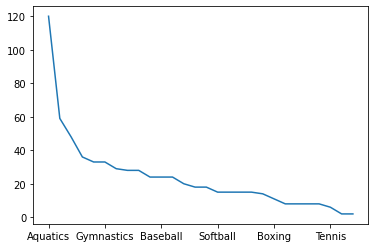

In [33]:
filteredData = data[data.Edition == 2008][data.Medal == 'Gold']
filteredData.Sport.value_counts()[:50].plot()

Each field in dataframe is represented as an array index. So that, if you want to get All gold medal you can use:

```python
data[data.Medal == 'Gold']
```

In [34]:
data[data.Medal == 'Gold'].reset_index().head(10)

,index,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
2,6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
3,9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold
4,13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
5,15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
6,18,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,1500m,M,Gold
7,21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
8,24,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,800m,M,Gold
9,27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold


In [43]:
beijingData = data[data.Edition == 2008][data.City == 'Beijing'][data.Medal == 'Gold']
summary = beijingData.groupby(['NOC']).Medal.agg(['count'])

<ipython-input-43-7fee505ff794>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  beijingData = data[data.Edition == 2008][data.City == 'Beijing'][data.Medal == 'Gold']


In [46]:
summary.describe()

,count
count,54.000000
mean,12.388889
std,21.554159
min,1.000000
25%,1.000000
50%,3.500000
75%,13.250000
max,125.000000


<AxesSubplot:>

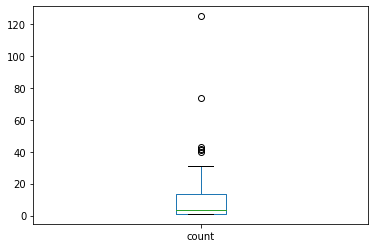

In [44]:
summary.boxplot(column=['count'], grid=False)

In [36]:
summary = summary.sort_values(by=['count'], ascending=False)

<AxesSubplot:xlabel='NOC'>

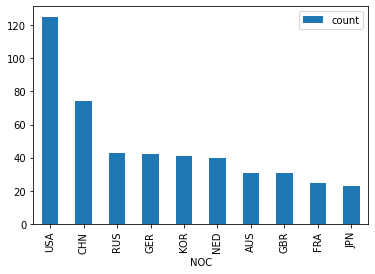

In [37]:
summary[:10].plot(kind='bar')

In [38]:
summary = beijingData.groupby(['NOC']).Medal.agg(['count'])

<AxesSubplot:xlabel='NOC'>

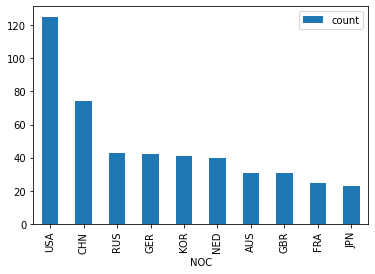

In [39]:
summary = summary.sort_values(by=['count'], ascending=False)
summary[:10].plot(kind='bar')

In [40]:
summary.head(10)

,count
NOC,
USA,125
CHN,74
RUS,43
GER,42
KOR,41
NED,40
AUS,31
GBR,31
FRA,25


In [41]:
summary.describe()

,count
count,54.000000
mean,12.388889
std,21.554159
min,1.000000
25%,1.000000
50%,3.500000
75%,13.250000
max,125.000000


In [47]:
summary.tail(10)

,count
NOC,
SLO,1
SUI,3
SVK,4
THA,2
TUN,1
TUR,1
UKR,10
USA,125
UZB,1


In [48]:
AusData = data[data.Edition == 2008][data.NOC == 'AUS']
summary = AusData.groupby(['Medal']).NOC.agg(['count'])

<ipython-input-48-272f84c91590>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AusData = data[data.Edition == 2008][data.NOC == 'AUS']


In [49]:
summary

,count
Medal,
Bronze,76
Gold,31
Silver,42


<AxesSubplot:xlabel='Medal'>

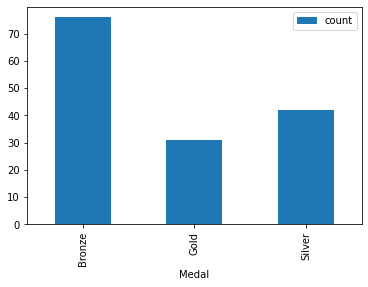

In [50]:
summary[:10].plot(kind='bar')

In [51]:
AusData = data[data.Edition == 2008][data.NOC == 'AUS']

<ipython-input-51-ab2b2472d061>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AusData = data[data.Edition == 2008][data.NOC == 'AUS']


In [52]:
AusData

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27196,Beijing,2008,Aquatics,Diving,"COLE, Briony",AUS,Women,synchronized diving 10m platform,W,Silver
27197,Beijing,2008,Aquatics,Diving,"WU, Melissa",AUS,Women,synchronized diving 10m platform,W,Silver
27210,Beijing,2008,Aquatics,Swimming,"STOECKEL, Hayden",AUS,Men,100m backstroke,M,Bronze
27221,Beijing,2008,Aquatics,Swimming,"JONES, Leisel",AUS,Women,100m breaststroke,W,Gold
...,...,...,...,...,...,...,...,...,...,...
28903,Beijing,2008,Softball,Softball,"WARD, Natalie",AUS,Women,softball,W,Bronze
28904,Beijing,2008,Softball,Softball,"WRIGHT, Belinda",AUS,Women,softball,W,Bronze
28905,Beijing,2008,Softball,Softball,"WYBORN, Kerry",AUS,Women,softball,W,Bronze
29013,Beijing,2008,Triathlon,Triathlon,"MOFFATT, Emma",AUS,Women,Individual,W,Bronze


# Export data

In [53]:
AusData.to_csv("ausdata.csv")

In [54]:
AusData.to_pickle("ausdata.pkl")

In [55]:
a = pd.read_pickle("ausdata.pkl")

In [56]:
a.equals(AusData)

True